Análisis primario de los datos
==============================

Análisis primario de una muestra de 100.000 filas del dataset de training.

Importación de paquetes
-----------------------

In [113]:
# Import module
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

Carga de datos
--------------

In [162]:
train = pd.read_csv("../data/train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=100000)
train['date_time'] = train['date_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
date_time                    100000 non-null datetime64[ns]
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63078 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99929 non-null datetime64[ns]
srch_co                      99929 non-null datetime64[ns]
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int

Análisis de datos por usuarios
------------------------------

Número de usuarios únicos: 3478
Número de usuarios con reservas: 2353
Número de reservas: 8270
Conversión: 0.0827


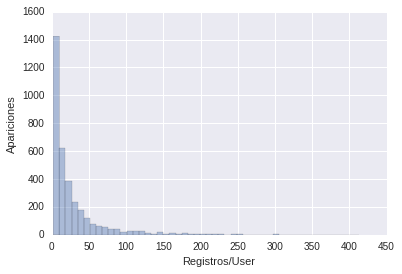

In [156]:
# Usuarios únicos
users = train['user_id'].unique()

# Número de reservas
books = train[(train['is_booking']==1)]

# Usuarios que reservaron
users_b = books['user_id'].unique()

# Distribución de número de registros por usuarios
logs = train.groupby(['user_id']).count()

print("Número de usuarios únicos: {}".format(len(users)))
print("Número de usuarios con reservas: {}".format(len(users_b)))
print("Número de reservas: {}".format(len(books)))
print("Conversión: {}".format(len(books)/len(train)))

plt.figure(1)
sns.distplot(logs['is_booking'], kde=False)
plt.xlabel('Registros/User')
plt.ylabel('Apariciones')
plt.show()

Análisis por cluster de hoteles
-------------------------------

Número de clusters distintos: 100


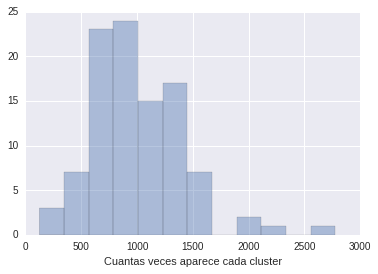

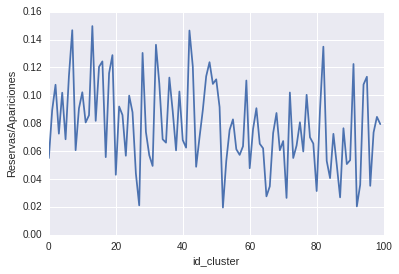

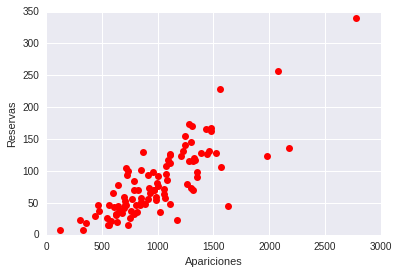

In [157]:
# Número de clusters
clusters = train['hotel_cluster'].unique()
n_cluster = len(clusters)

print("Número de clusters distintos: {}".format(n_cluster))

# Cuantas veces aparece cada cluster
dist_cluster = train[['hotel_cluster', 'is_booking']].groupby('hotel_cluster').agg(['sum', 'count'])
dist_cluster['performance'] = dist_cluster['is_booking']['sum']/dist_cluster['is_booking']['count']

# Relación entre apariciones y reservas
dist_cluster_b = dist_cluster['is_booking']

# Distribución de apariciones de clusters
plt.figure(1)
sns.distplot(dist_cluster['is_booking']['count'], kde=False)
plt.xlabel('Cuantas veces aparece cada cluster')
plt.show()

# Performance de los clusters
plt.figure(2)
plt.plot(dist_cluster['performance'])
plt.xlabel('id_cluster')
plt.ylabel('Reservas/Apariciones')
plt.show()

plt.figure(3)
plt.plot(dist_cluster_b['count'], dist_cluster_b['sum'], 'ro')
plt.xlabel('Apariciones')
plt.ylabel('Reservas')
plt.show()

# Primera propuesta de modelo, recomendar los 10 clusters con mejor performance.

Análisis por fecha y hora del registro
--------------------------------------

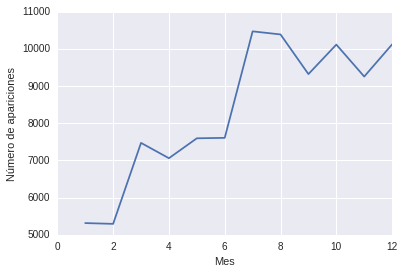

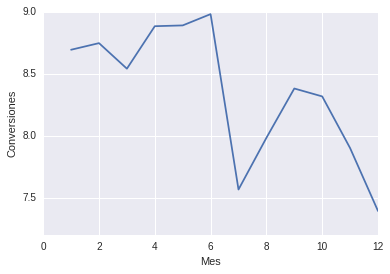

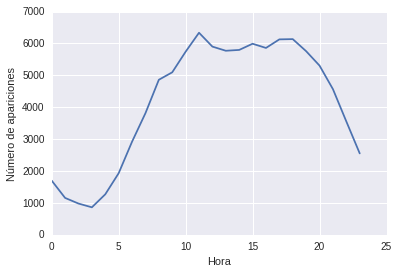

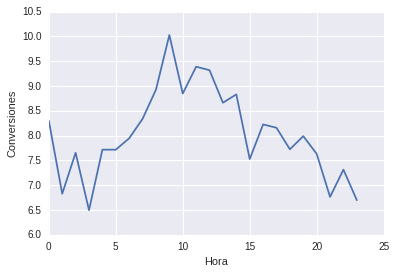

In [158]:
# Análisis por meses
train['mes'] = train['date_time'].apply(lambda x: x.month)
meses_group = train[['mes', 'is_booking']].groupby('mes').agg(['count', 'sum'])
meses_group['conversion'] = meses_group['is_booking']['sum']/meses_group['is_booking']['count']*100

plt.figure(1)
plt.plot(meses_group['is_booking']['count'])
plt.xlabel('Mes')
plt.ylabel('Número de apariciones')
plt.show()

plt.figure(2)
plt.plot(meses_group['conversion'])
plt.xlabel('Mes')
plt.ylabel('Conversiones')
plt.show()

# Análisis por hora
train['hora'] = train['date_time'].apply(lambda x: x.hour)
hora_group = train[['hora', 'is_booking']].groupby('hora').agg(['count', 'sum'])
hora_group['conversion'] = hora_group['is_booking']['sum']/hora_group['is_booking']['count']*100

plt.figure(1)
plt.plot(hora_group['is_booking']['count'])
plt.xlabel('Hora')
plt.ylabel('Número de apariciones')
plt.show()

plt.figure(2)
plt.plot(hora_group['conversion'])
plt.xlabel('Hora')
plt.ylabel('Conversiones')
plt.show()


Análisis por fecha del check in
-------------------------------

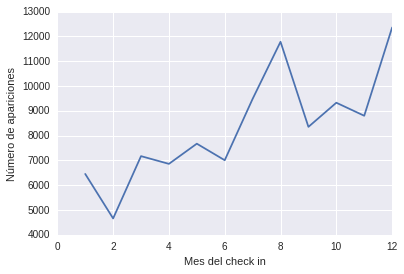

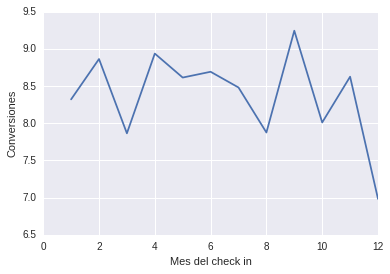

In [165]:
# Análisis por fecha de check in
train['mes_ci'] = train['srch_ci'].apply(lambda x: x.month)
meses_group_ci = train[['mes_ci', 'is_booking']].groupby('mes_ci').agg(['count', 'sum'])
meses_group_ci['conversion'] = meses_group_ci['is_booking']['sum']/meses_group_ci['is_booking']['count']*100

plt.figure(1)
plt.plot(meses_group_ci['is_booking']['count'])
plt.xlabel('Mes del check in')
plt.ylabel('Número de apariciones')
plt.show()

plt.figure(2)
plt.plot(meses_group_ci['conversion'])
plt.xlabel('Mes del check in')
plt.ylabel('Conversiones')
plt.show()
